Import the required packages below:

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

Read in the CSV file data/airlines.csv containing the following info:
![title](data/airlines.png)
Use it to answer the following questions:

1. Make a scatterplot of baggage vs. on time arrivals.

               bags  Time
Airline                  
American West  4.36  81.9
United         4.00  80.9
Southwest      4.42  78.4
US Airways     7.16  78.3
Continental    4.62  75.7
Jet Blue       5.92  73.8
American       6.50  73.1
Delta          8.03  70.1
Alaska         7.02  69.1
Northwest      5.36  67.2


Text(0, 0.5, 'Percentage On Time Arrivals')

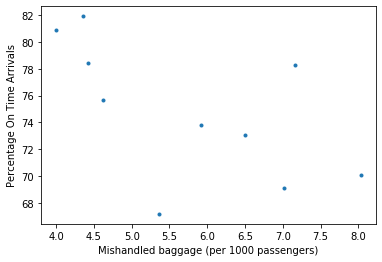

In [21]:
#Reading Data
df = pd.read_csv('data/airlines.csv', index_col = 0)
df = df.rename(columns={'Mishandled baggage (per 1000 passengers)': 'bags','Percentage On Time Arrivals':'Time'})
print(df)

X = df['bags']
Y = df['Time']
plt.plot(X, Y, '.')
plt.xlabel('Mishandled baggage (per 1000 passengers)')
plt.ylabel('Percentage On Time Arrivals')

2. What is the correlation between baggage and on time arrivals?

In [6]:
pearsonr(X, Y)[0]

-0.5953193405508687

3. What are the mean and standard deviation of the X and Y variables

In [7]:
print(f"X mean: {X.mean()}, Y mean: {Y.mean()}")
print(f"X std: {X.std()}, Y std: {Y.std()}")

X mean: 5.739, Y mean: 74.85000000000001
X std: 1.3977000949973335, Y std: 5.0535466093955606


4. Calculate the line of best fit by hand (show your calculations you use below).

## The Line that best fits
$y = -2.151x + 62.505 $

$ m = -0.595 (\frac{5.054}{1.398}) = -2.152 $

$b = 74.85 + 2.152 * 5.739 = 87.200 $

5.Use scikit-learn to calculate the line of best fit. Print the slope and intercept.

In [8]:
model = LinearRegression()
y = df['Time']
X = df.drop('Time', axis=1)
model.fit(X, y)
print('b: ', model.intercept_)
print('m: ', model.coef_)

b:  87.20288782505382
m:  [-2.15244604]


6.Superimpose the line of best fit on the data.

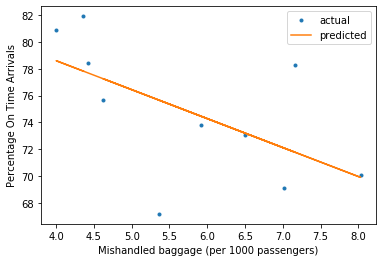

In [9]:
b = model.intercept_
m = model.coef_[0]
plt.plot(X,y,'.', label='actual')
plt.plot(X, m*X+b, '-', label='predicted')
plt.xlabel('Mishandled baggage (per 1000 passengers)')
plt.ylabel('Percentage On Time Arrivals')
plt.legend()

7. Interpret the slope of your model in context.

In [10]:
#insert 7
print('The slope of −2.152 means that with every 1 increase in the number of mishandled baggage, the percentage of on time arrivals is expected to decrease by 2.152')

The slope of −2.152 means that with every 1 increase in the number of mishandled baggage, the percentage of on time arrivals is expected to decrease by 2.152


8. Interpret the intercept of your model in context.

In [11]:
#insert 8
print('When the number of mishandled baggage is 0, the percent of on-time arrivals is 87.20%')

When the number of mishandled baggage is 0, the percent of on-time arrivals is 87.20%


9.Calculate and explain the meaning of your $R^2$ in context.

In [12]:
#insert 9
print(model.score(X,y))
print('45% of variation can be accounted by the ')

0.35440511723392165

10.Create a residual plot. Based on the residual plot, does a linear model seem appropriate?

Text(0, 0.5, 'Risidual')

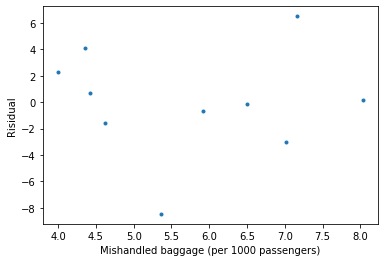

In [20]:
#insert 10
plt.plot(X,y - model.predict(X),'.', label='actual')
plt.xlabel('Mishandled baggage (per 1000 passengers)')
plt.ylabel('Risidual')
print('No, due to the downwards and upwards trend')

11. Calculate the residual of American Airlines using Python syntax.

In [36]:
#insert 11
print(df.loc['American', 'Time'] - model.predict([[df.bags['American']]]))

[-0.11198856]


12. As a consumer, would you prefer to fly on an airline that had a positive or negative residual? Why?

In [37]:
#insert 12
print('Positive because you want a higher percentage of on-time arrivals')

Positive because you want a higher percentage of on-time arrivals


13. What would you predict an airline with a mishandled baggage rate of 10 (per 1000 customers) to have as their ontime arrival percentage?

In [38]:
#Insert 13
model.predict([[10]])

array([65.67842742])